In [2]:
suppressMessages(library(readr))
suppressMessages(library(tidyr))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
library('forecast')
library('tseries')

In [3]:
data <- read_csv("denguecases.csv")

Parsed with column specification:
cols(
  Month = col_character(),
  Year = col_integer(),
  Region = col_character(),
  Dengue_Cases = col_double()
)


In [4]:
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1836 obs. of  4 variables:
 $ Month       : chr  "Jan" "Feb" "Mar" "Apr" ...
 $ Year        : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ Region      : chr  "Region.I" "Region.I" "Region.I" "Region.I" ...
 $ Dengue_Cases: num  2.954 2.183 0.972 9.357 7.321 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 4
  .. ..$ Month       : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ Year        : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ Region      : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ Dengue_Cases: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [5]:
#Change Month and Region to Factor
data$Month <- factor(data$Month, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                           "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))
data$Region <- factor(data$Region)
data$Year <- factor(data$Year)

In [6]:
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1836 obs. of  4 variables:
 $ Month       : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Year        : Factor w/ 9 levels "2008","2009",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Region      : Factor w/ 17 levels "ARMM","CAR","CARAGA",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Dengue_Cases: num  2.954 2.183 0.972 9.357 7.321 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 4
  .. ..$ Month       : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ Year        : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ Region      : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ Dengue_Cases: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [7]:
summary(data)

     Month          Year           Region      Dengue_Cases    
 Jan    :153   2008   :204   ARMM     : 108   Min.   :  0.000  
 Feb    :153   2009   :204   CAR      : 108   1st Qu.:  2.947  
 Mar    :153   2010   :204   CARAGA   : 108   Median :  6.395  
 Apr    :153   2011   :204   NCR      : 108   Mean   : 11.297  
 May    :153   2012   :204   Region.I : 108   3rd Qu.: 13.438  
 Jun    :153   2013   :204   Region.II: 108   Max.   :147.324  
 (Other):918   (Other):612   (Other)  :1188                    

In [8]:
head(data)

Month,Year,Region,Dengue_Cases
Jan,2008,Region.I,2.953926
Feb,2008,Region.I,2.183336
Mar,2008,Region.I,0.972410
Apr,2008,Region.I,9.357156
May,2008,Region.I,7.320599
Jun,2008,Region.I,4.513452


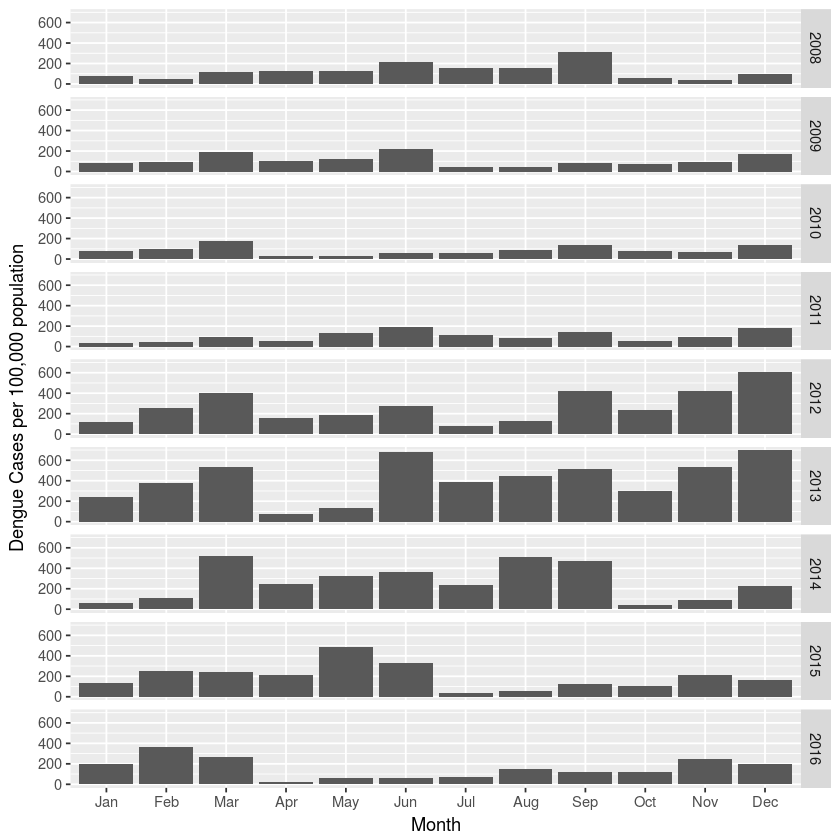

In [9]:
ggplot(data, aes(x = Month, y = Dengue_Cases)) +
    geom_bar(stat = "identity") +
    facet_grid(Year ~ .) +
    ylab("Dengue Cases per 100,000 population")

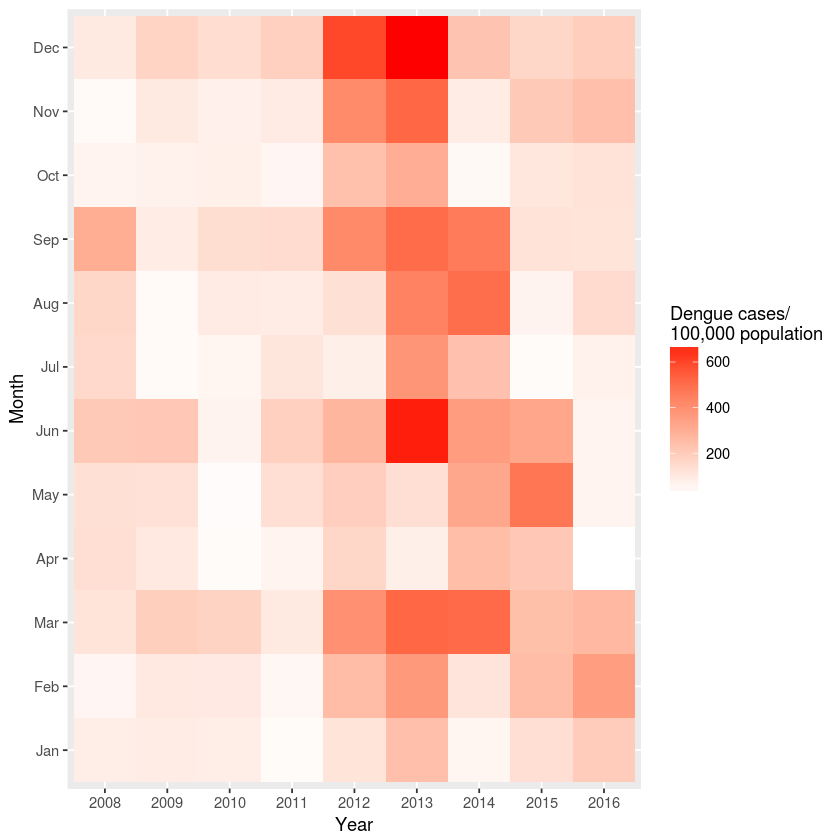

In [10]:
data %>%
    group_by(Year, Month) %>%
    summarise(Total_Cases = sum(Dengue_Cases)) %>%
    ggplot(aes(Year,Month,fill=Total_Cases)) + 
    geom_tile() +
    scale_fill_gradient(low = "white", high = "red", name = "Dengue cases/ \n100,000 population") +
    xlab(label="Year") + 
    ylab(label="Month")

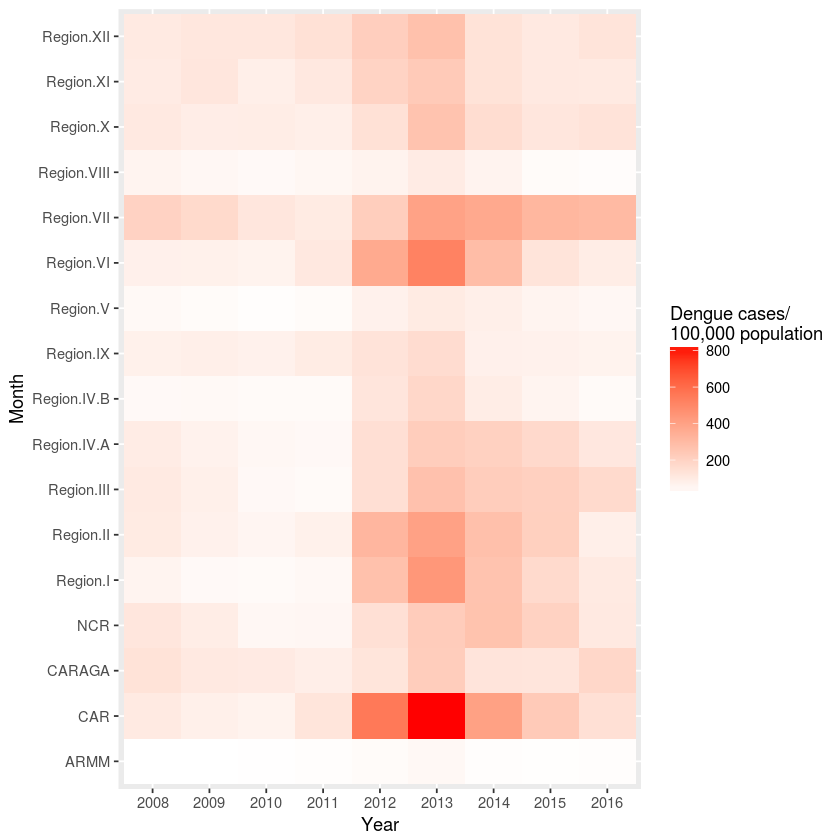

In [11]:
data %>%
    group_by(Year, Region) %>%
    summarise(Total_Cases = sum(Dengue_Cases)) %>%
    ggplot(aes(Year,Region,fill=Total_Cases)) + 
    geom_tile() +
    scale_fill_gradient(low = "white", high = "red", name = "Dengue cases/ \n100,000 population") +
    xlab(label="Year") + 
    ylab(label="Month") 

In [12]:
total_cases <- data %>%
    group_by(Year, Month) %>%
    summarise(Total_Cases = sum(Dengue_Cases))

In [13]:
total_cases_ts <- ts(total_cases$Total_Cases, start=c(2008,1), end=c(2016,12), frequency=12) 

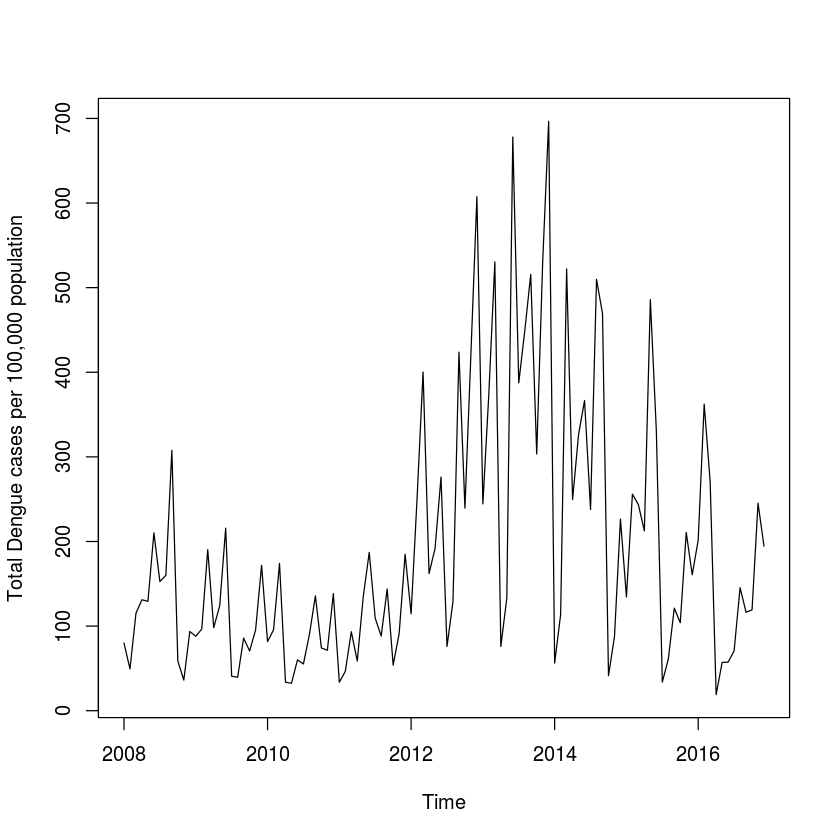

In [14]:
plot(total_cases_ts, ylab = "Total Dengue cases per 100,000 population")

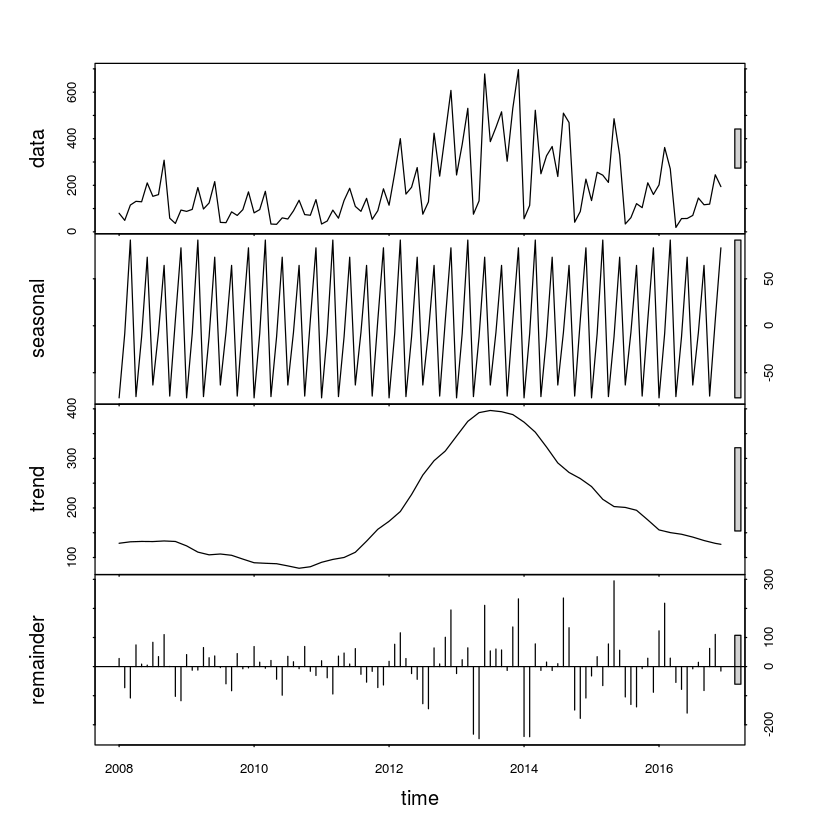

In [16]:
plot(stl(total_cases_ts, s.window = "periodic"))

In [17]:
adf.test(total_cases_ts, alternative = "stationary")


	Augmented Dickey-Fuller Test

data:  total_cases_ts
Dickey-Fuller = -1.9795, Lag order = 4, p-value = 0.5851
alternative hypothesis: stationary


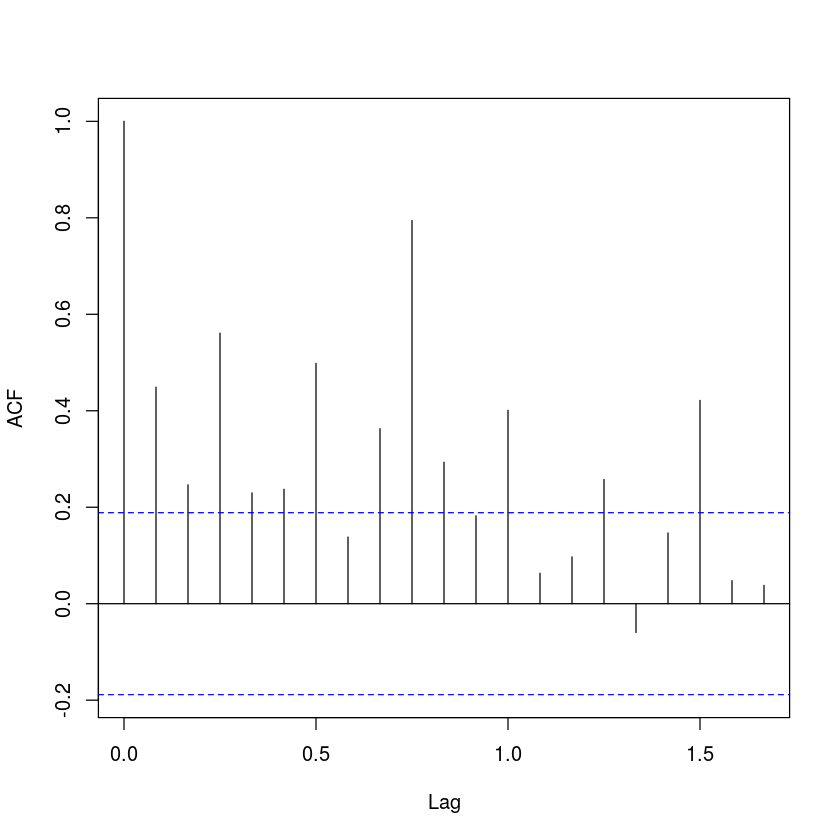

In [20]:
acf(total_cases_ts, main = "")

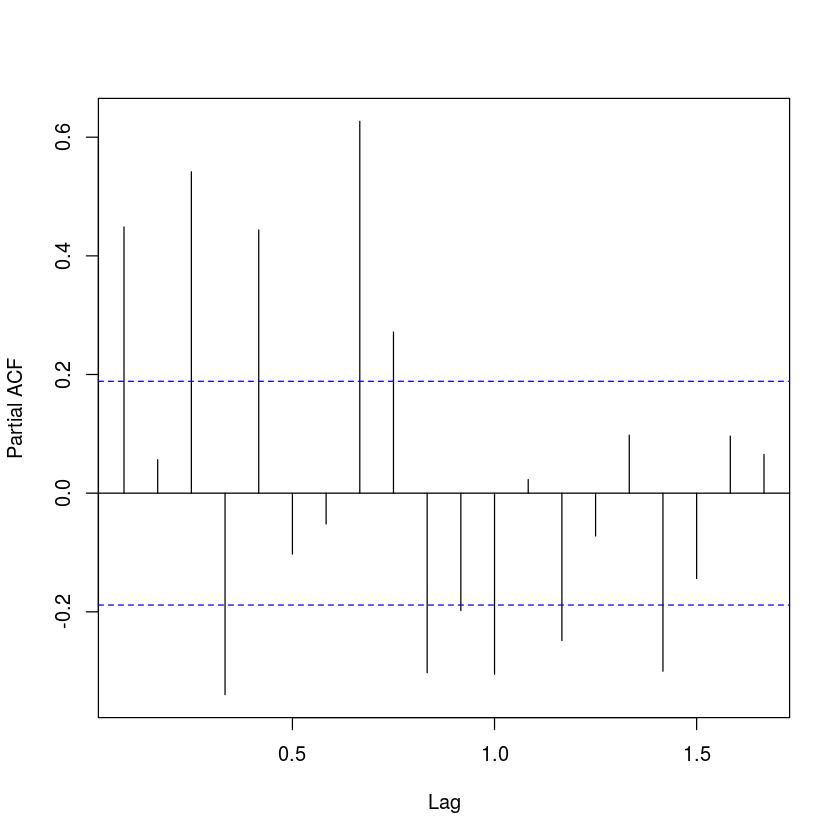

In [21]:
pacf(total_cases_ts, main = "")

In [36]:
total_cases_diff = diff(total_cases_ts, differences = 1)

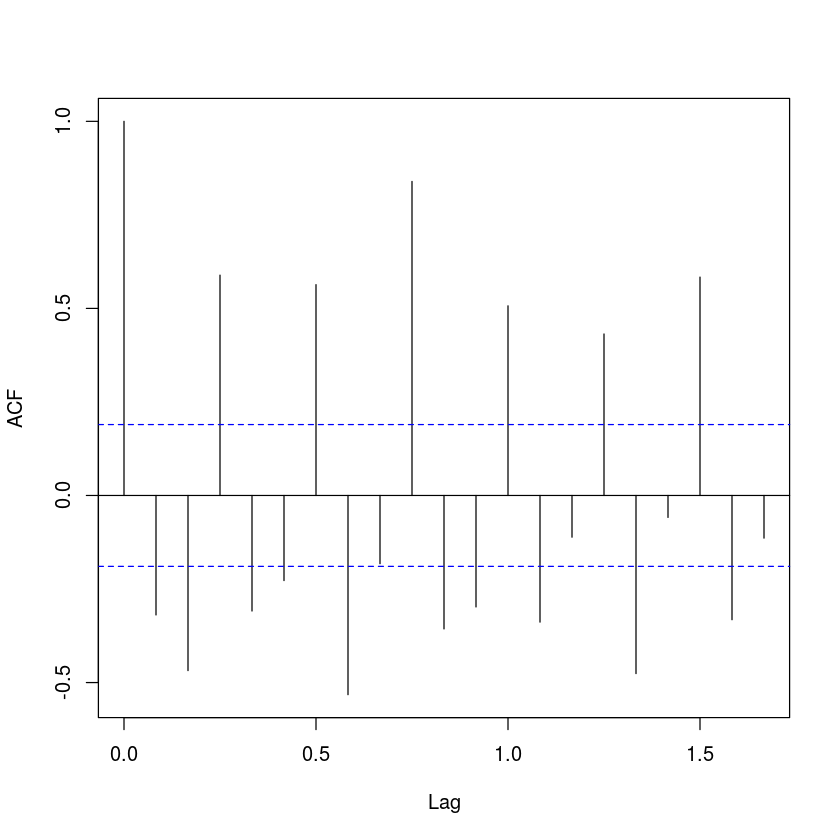

In [37]:
acf(total_cases_diff, main = "")

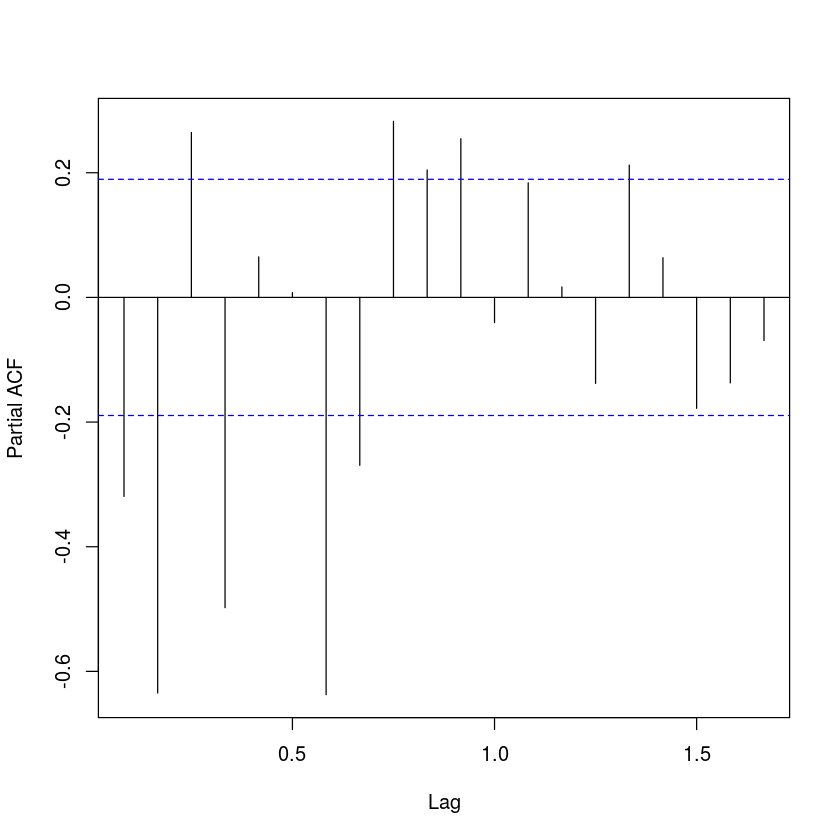

In [38]:
pacf(total_cases_diff, main = "")

In [42]:
adf.test(total_cases_diff, alternative = "stationary")

Warning message in adf.test(total_cases_diff, alternative = "stationary"):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  total_cases_diff
Dickey-Fuller = -6.3132, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


In [39]:
dengue_arima <- auto.arima(total_cases_ts)

In [40]:
dengue_arima

Series: total_cases_ts 
ARIMA(3,1,3)(2,0,0)[12] 

Coefficients:
          ar1      ar2     ar3     ma1      ma2      ma3     sar1     sar2
      -0.7519  -0.6843  0.2709  0.6205  -0.1055  -0.7144  -0.2860  -0.3594
s.e.   0.1344   0.1408  0.1330  0.0931   0.1212   0.0857   0.1023   0.1002

sigma^2 estimated as 6484:  log likelihood=-622.15
AIC=1262.29   AICc=1264.15   BIC=1286.35

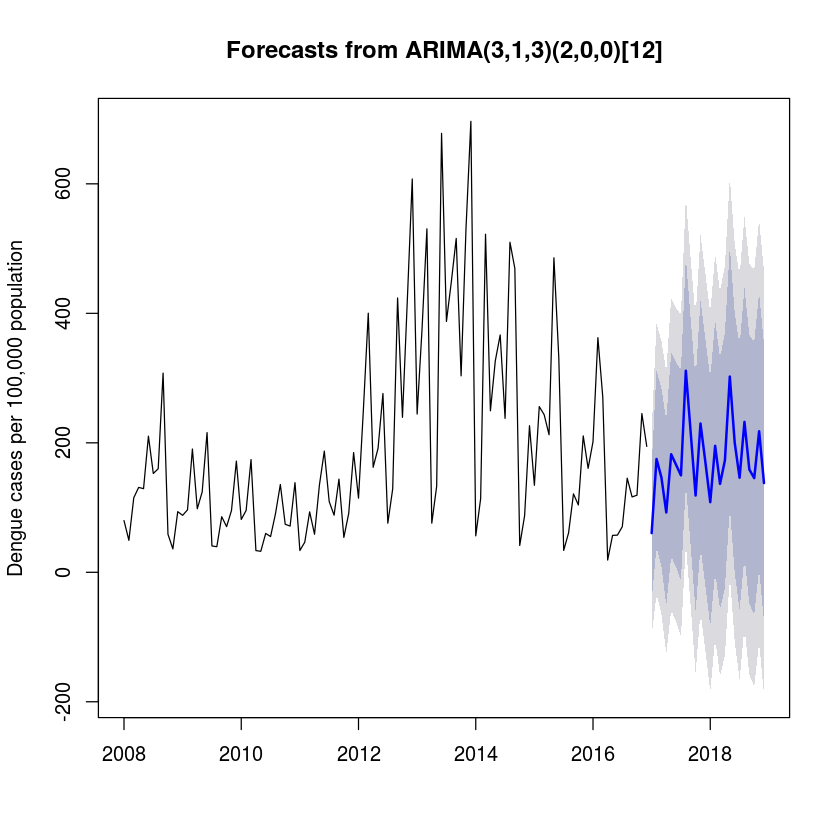

In [45]:
dengue_future <- forecast(dengue_arima, 24)
plot(dengue_future, ylab = "Dengue cases per 100,000 population")

In [44]:
head(dengue_future)

$method
[1] "ARIMA(3,1,3)(2,0,0)[12]"

$model
Series: total_cases_ts 
ARIMA(3,1,3)(2,0,0)[12] 

Coefficients:
          ar1      ar2     ar3     ma1      ma2      ma3     sar1     sar2
      -0.7519  -0.6843  0.2709  0.6205  -0.1055  -0.7144  -0.2860  -0.3594
s.e.   0.1344   0.1408  0.1330  0.0931   0.1212   0.0857   0.1023   0.1002

sigma^2 estimated as 6484:  log likelihood=-622.15
AIC=1262.29   AICc=1264.15   BIC=1286.35

$level
[1] 80 95

$mean
           Jan       Feb       Mar       Apr       May       Jun       Jul
2017  60.53120 175.02016 146.57836  92.43455 182.30553 166.06452 149.72370
2018 108.32270 195.35478 136.56950 172.98664 302.30937 200.45468 146.08355
           Aug       Sep       Oct       Nov       Dec
2017 311.35110 215.34092 118.62186 229.79417 170.25127
2018 232.30658 158.73088 145.48062 217.82134 137.85669

$lower
                 80%         95%
Jan 2017 -42.6838584  -97.322609
Feb 2017  38.3237973  -34.038886
Mar 2017   8.6620046  -64.346506
Apr 2017 -49.9708